In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pyscenic
print(pyscenic.__version__)

0.12.0


In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")

-----
anndata     0.9.1
scanpy      1.9.3
-----
PIL                 10.0.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
cloudpickle         2.2.1
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.1
dask                2023.6.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
h5py                3.9.0
ipykernel           6.24.0
ipython_genutils    0.2.0
jedi                0.18.2
jinja2              3.1.2
joblib              1.3.1
kiwisolver          1.4.4
llvmlite            0.40.1
lz4                 4.3.2
markupsafe          2.1.3
matplotlib          3.7.2
mpl_toolkits        NA
natsort             8.4.0
numba               0.57.1
numexpr             2.8.4
numpy               1.23.4
packaging           23.1
pandas              1.5.2
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare   

In [4]:
intestine_integrated = sc.read_h5ad("./../../../pyobjs_github/intestine_1.h5ad")

In [5]:
small_muscle = sc.read_h5ad("./../../../pyobjs_github/small_muscle.h5ad")
print(small_muscle.shape)

(7519, 2510)


In [52]:
tf_genes1 = pd.read_csv("./../../../../pyscenic_databases/mm_mgi_tfs.txt", header=None)[0].values
print(len(tf_genes1))
tf_genes1[1:5]

1721


array(['Zfp128', 'Zfp853', 'Nr1h2', 'Nr1h3'], dtype=object)

In [53]:
adata = small_muscle.raw.to_adata()
# adata = adata[:,np.intersect1d(adata.var_names, tf_genes_mouse)]
adata = adata[:,np.intersect1d(adata.var_names, tf_genes1)]

In [61]:
sc.tl.rank_genes_groups(adata, groupby="clusters_muscle_leiden_0.7", key_added="tf_dgea")

ranking genes
    finished: added to `.uns['tf_dgea']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [62]:
result = adata.uns['tf_dgea']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges','pvals']})
celltype_markers.head(10)

,Mesenchymal progenitors-1_n,Mesenchymal progenitors-1_l,Mesenchymal progenitors-1_p,Mesenchymal progenitors-2_n,Mesenchymal progenitors-2_l,Mesenchymal progenitors-2_p,Mesenchymal progenitors-3_n,Mesenchymal progenitors-3_l,Mesenchymal progenitors-3_p,Gut wall mesenchymal progenitors_n,...,Pdgfra+ fibroblast-like cells_p,Tnc+ Acta-low myofibroblast-like cells_n,Tnc+ Acta-low myofibroblast-like cells_l,Tnc+ Acta-low myofibroblast-like cells_p,SM-3 (Villus)_n,SM-3 (Villus)_l,SM-3 (Villus)_p,Pericytes_n,Pericytes_l,Pericytes_p
0,Peg3,1.886180,2.774601e-212,Rps10,0.458790,3.685036e-139,H2afz,1.100738,3.429192e-52,Meis2,...,0.000000e+00,Fhl2,3.355791,7.044517e-23,Mef2c,4.903547,1.019139e-87,Ebf1,3.874637,7.858972e-133
1,Isl1,4.905148,8.838404e-130,Nr2f2,0.880277,1.183338e-78,Nr2f2,1.063860,7.282518e-52,Foxp2,...,0.000000e+00,Nfib,1.293912,6.130510e-17,Zfhx3,2.572306,1.412697e-55,Epas1,6.292048,1.396699e-80
2,Nr2f2,1.433649,4.662035e-103,Jun,0.998044,5.801582e-68,Rbm3,0.652404,4.182023e-52,Foxp1,...,3.965255e-254,Peg3,1.333017,6.189123e-17,Mylk,2.837607,4.730401e-50,Tagln2,3.243022,4.014673e-70
3,Pitx2,3.260390,2.588201e-88,Tpi1,0.739743,2.450242e-62,Ran,0.941017,3.853118e-46,Foxf1,...,3.169876e-215,Tagln2,2.290566,7.638899e-16,Epas1,4.929906,1.172803e-45,Ets1,3.070370,3.360188e-47
4,Prnp,1.521530,1.777416e-72,Peg3,0.839676,5.248609e-59,Ybx1,0.698850,1.093193e-45,Rps4x,...,2.152835e-167,Zeb2,1.651864,9.426135e-16,Tbx2,3.485871,2.615347e-44,Foxf1,2.358581,1.472656e-45
5,Cux2,2.158107,1.020197e-57,Nme1,0.766139,2.235684e-55,Zeb2,1.060508,7.357930e-43,Tcf21,...,4.106604e-145,Meox2,4.456367,4.880346e-15,Ebf1,2.256335,1.040101e-45,Cebpb,3.443273,1.572180e-44
6,Hmga2,1.672560,1.383050e-50,Rpl6,0.331873,1.158551e-54,Heyl,2.210717,7.850361e-38,Etv1,...,1.133380e-128,Gata6,2.028128,9.122616e-14,Hey2,4.516576,4.221278e-39,Foxf2,5.300659,2.170437e-36
7,Hnrnpc,0.827694,5.434374e-50,Hnrnpc,0.634516,1.702904e-48,Hmgb2,1.263409,3.065747e-34,Scx,...,3.760205e-131,Prrx1,2.602130,2.609204e-13,Heyl,3.798083,2.142763e-38,Zeb2,1.721529,1.799919e-33
8,Gata6,1.386048,2.799121e-47,Hspa5,0.564416,4.547652e-43,Rnaseh2c,1.085756,3.290895e-32,Rps10,...,6.509526e-117,Egr1,2.903052,3.463213e-12,Zeb2,1.920665,7.612474e-38,Nkx2-3,1.774740,3.640143e-33
9,Id2,1.006186,5.866750e-44,Odc1,0.877239,2.909726e-42,Nme1,0.841379,7.064062e-27,Bcl11a,...,2.201532e-111,Nr2f2,0.973660,7.039744e-10,Thra,1.565020,1.716012e-29,Smad6,4.178567,1.239138e-32


In [64]:
sc.tl.dendrogram(adata, groupby="clusters_muscle_leiden_0.7")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters_muscle_leiden_0.7']`


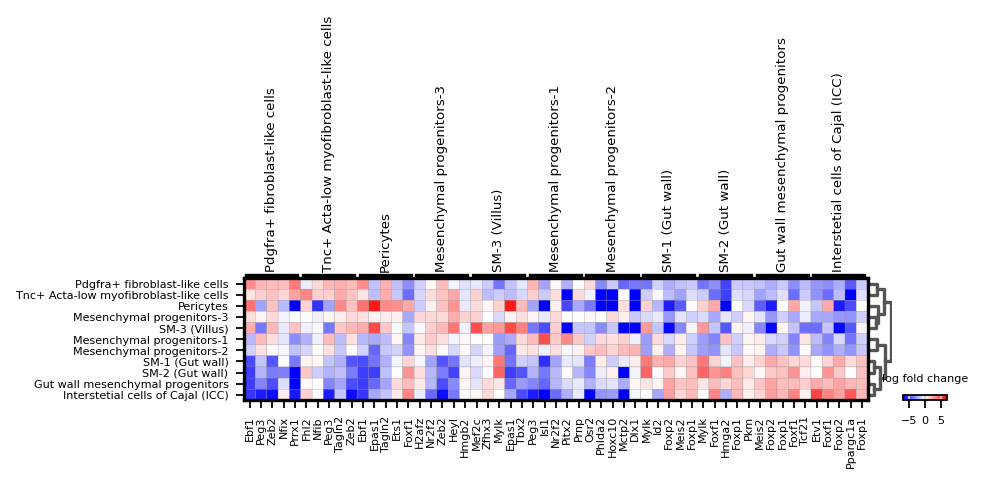

In [71]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (6,3.0))
sc.pl.rank_genes_groups_matrixplot(adata, n_genes=5, key="tf_dgea", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/small_muscle_tf_dgea.pdf")

In [56]:
marker_list = list()
for group in adata.uns['tf_dgea']['names'].dtype.names:
    markers = sc.get.rank_genes_groups_df(adata, key='tf_dgea', group = group).head(50)
    markers["celltypes"] = group
    marker_list.append(markers)

In [57]:
pd.concat(marker_list).to_csv("./../tf_dgea.csv", index=False)

In [49]:
adata = sc.read_h5ad("./../../../pyobjs_github/intestine_1_raw_counts.h5ad")
adata = adata[small_muscle.obs_names]
adata

View of AnnData object with n_obs × n_vars = 7519 × 24946
    obs: 'sample', 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors'

In [50]:
# create basic row and column attributes for the loom file:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
import loompy as lp
lp.create("./../scenic_input.loom", adata.X.transpose(), row_attrs, col_attrs)

In [36]:
f_tfs = "./../../../../pyscenic_databases/mm_mgi_tfs.txt"   # mouse
pd.read_csv(f_tfs, header=None)[0]
# tf_names = load_tf_names( f_tfs )

0         Hoxa9
1        Zfp128
2        Zfp853
3         Nr1h2
4         Nr1h3
         ...   
1716      Vps72
1717    Zdhhc24
1718       Abl1
1719      Fank1
1720       Zeb2
Name: 0, Length: 1721, dtype: object

In [37]:
!pyscenic grn {"./../scenic_input.loom"} {f_tfs} -o adj.csv --num_workers 20


2023-09-28 00:08:10,094 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-09-28 00:08:11,946 - pyscenic.cli.pyscenic - INFO - Inferring regulatory networks.
preparing dask client
parsing input
creating dask graph
20 partitions
computing dask graph
/home/mm2937/miniconda3/envs/pyscenic_python310/lib/python3.10/site-packages/distributed/client.py:3125: UserWarning: Sending large graph of size 159.00 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
not shutting down client, client was created externally
finished
2023-09-28 00:41:19,854 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/home/mm2937/miniconda3/envs/pyscenic_python310/lib/python3.10/site-packages/distributed/comm/tcp.py", line 225, in read
    frames_nbytes = await stream.read_bytes(fmt_size)
tornado.iostream.StreamClosedError: Stream is closed

The above exception was t

In [38]:
adjacencies = pd.read_csv("./adj.csv", index_col=False, sep=',')

In [43]:
adjacencies

,TF,target,importance
0,Olig1,Gm45783,1.280203e+01
1,Lrrfip1,Wdr95,1.155913e+01
2,Foxc1,Shpk,1.140863e+01
3,Hmgb2,Cdca3,1.101685e+01
4,Spi1,Mcemp1,1.074646e+01
...,...,...,...
1881606,Wt1,Spp1,8.571256e-20
1881607,Zzz3,Hbb-bt,4.477908e-20
1881608,Mynn,Hbb-bt,3.372602e-20
1881609,Hivep1,Hbb-bt,1.969713e-20


In [40]:
import glob
# ranking databases
f_db_glob = "./../../../../pyscenic_databases/mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings.feather"
f_db_names = ' '.join( glob.glob(f_db_glob) )

# motif databases
f_motif_path = "./../../../../pyscenic_databases/motifs-v9-nr.mgi-m0.001-o0.0.tbl"

In [41]:
!pyscenic ctx adj.csv \
    {f_db_names} \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {"./../scenic_input.loom"} \
    --output reg.csv \
    --mask_dropouts \
    --num_workers 20


2023-09-28 00:41:36,979 - pyscenic.cli.pyscenic - INFO - Creating modules.

2023-09-28 00:41:37,658 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-09-28 00:41:40,077 - pyscenic.utils - INFO - Calculating Pearson correlations.

2023-09-28 00:41:40,389 - pyscenic.utils - WARNING - Note on correlation calculation: the default behaviour for calculating the correlations has changed after pySCENIC verion 0.9.16. Previously, the default was to calculate the correlation between a TF and target gene using only cells with non-zero expression values (mask_dropouts=True). The current default is now to use all cells to match the behavior of the R verision of SCENIC. The original settings can be retained by setting 'rho_mask_dropouts=True' in the modules_from_adjacencies function, or '--mask_dropouts' from the CLI.
	Dropout masking is currently set to [True].

2023-09-28 00:41:46,759 - pyscenic.utils - INFO - Creating modules.

2023-09-28 00:43:26,113 - pyscenic.cli.pyscenic - IN


2023-09-28 00:43:32,154 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(8): motif annotations loaded in memory.

2023-09-28 00:43:32,154 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(8): motif annotations loaded in memory.

2023-09-28 00:43:32,205 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(1): motif annotations loaded in memory.

2023-09-28 00:43:32,205 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(1): motif annotations loaded in memory.

2023-09-28 00:43:32,206 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(7): motif annotations loaded in memory.

2023-09-28 00:43:32,206 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(7): motif annotations loaded in 


2023-09-28 00:44:24,389 - pyscenic.transform - WARNING - Less than 80% of the genes in Zfp239 could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings. Skipping this module.

2023-09-28 00:44:30,079 - pyscenic.transform - WARNING - Less than 80% of the genes in Zfp598 could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings. Skipping this module.

2023-09-28 00:44:30,253 - pyscenic.transform - WARNING - Less than 80% of the genes in Zfp652 could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings. Skipping this module.

2023-09-28 00:44:30,836 - pyscenic.transform - WARNING - Less than 80% of the genes in Zfp846 could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings. Skipping this module.

2023-09-28 00:44:39,615 - pyscenic.transform - WARNING - Less than 80% of the genes in Regulon for 6720489N17Rik could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.


2023-09-28 00:46:56,733 - pyscenic.transform - WARNING - Less than 80% of the genes in Gtf3c2 could be mapped to mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings. Skipping this module.

2023-09-28 00:46:56,920 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(6): All regulons derived.

2023-09-28 00:46:56,920 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(6): All regulons derived.

2023-09-28 00:46:56,938 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(6): Done.

2023-09-28 00:46:56,938 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(6): Done.

2023-09-28 00:47:01,805 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(13): All regulons derived.

2023-09-28 00:47:01,805 - pyscenic.prune - INFO - Wor


2023-09-28 00:48:22,749 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(17): All regulons derived.

2023-09-28 00:48:22,749 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(17): All regulons derived.

2023-09-28 00:48:22,903 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(17): Done.

2023-09-28 00:48:22,903 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(17): Done.

2023-09-28 00:48:25,083 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(1): All regulons derived.

2023-09-28 00:48:25,083 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings(1): All regulons derived.

2023-09-28 00:48:25,136 - pyscenic.prune - INFO - Worker mm10__refseq-r80__10kb_up_and_down_tss.mc9nr.g

In [7]:
!pyscenic aucell \
    {"./../scenic_input.loom"} \
    reg.csv \
    --output {"./../pyscenic_output.loom"} \
    --num_workers 20


2023-09-28 01:16:54,088 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2023-09-28 01:16:55,942 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.
Create regulons from a dataframe of enriched features.
Additional columns saved: []

2023-09-28 01:17:00,499 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.

2023-09-28 01:17:20,424 - pyscenic.cli.pyscenic - INFO - Writing results to file.
/home/mm2937/.local/lib/python3.10/site-packages/pyscenic/cli/utils.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, threshold in auc_thresholds.iteritems()


In [12]:
import json
import zlib
import base64
import loompy as lp

# collect SCENIC AUCell output
lf = lp.connect( "./../pyscenic_output.loom", mode='r+', validate=False )
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

In [14]:
auc_mtx

,Abl1(+),Ahr(+),Ar(+),Arid3a(+),Arnt(+),Ascl1(+),Atf2(+),Atf3(+),Atf5(+),Atf6(+),...,Zfp729a(+),Zfp729b(+),Zfp768(+),Zfp821(+),Zfp930(+),Zfp931(+),Zfp937(+),Zfp975(+),Zmiz1(+),Zscan20(+)
AAACCCAGTTTACTGG-1-E-12.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.051492,0.024014,0.004362,0.016540,...,0.000000,0.000000,0.008328,0.000000,0.007150,0.000000,0.0,0.0,0.039191,0.0
AAACGAACAGGTCAAG-1-E-12.5,0.0,0.000000,0.000000,0.000000,0.000000,0.014895,0.024389,0.023730,0.000000,0.001169,...,0.000000,0.000000,0.000000,0.000000,0.016974,0.000000,0.0,0.0,0.026414,0.0
AAACGAAGTCAAGTTC-1-E-12.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032161,0.023584,0.000255,0.009205,...,0.007217,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.019415,0.0
AAACGAAGTTTACGAC-1-E-12.5,0.0,0.000000,0.028736,0.000000,0.000000,0.000000,0.025849,0.019778,0.000437,0.018661,...,0.033601,0.000000,0.000000,0.014398,0.000000,0.000000,0.0,0.0,0.026551,0.0
AAACGCTGTAACCAGG-1-E-12.5,0.0,0.000000,0.000000,0.000000,0.000000,0.016004,0.030775,0.018280,0.000000,0.010692,...,0.000000,0.000000,0.000000,0.000000,0.006014,0.000000,0.0,0.0,0.024254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTTGGTG-1-P-1.5,0.0,0.026693,0.131516,0.000000,0.062894,0.013991,0.026265,0.047051,0.031518,0.008688,...,0.053488,0.186047,0.000000,0.010279,0.066025,0.150418,0.0,0.0,0.028346,0.0
TTTGTTGCAACATACC-1-P-1.5,0.0,0.010482,0.061080,0.003742,0.000000,0.000000,0.032975,0.039539,0.010389,0.016657,...,0.000000,0.134265,0.000000,0.000000,0.027533,0.072059,0.0,0.0,0.008041,0.0
TTTGTTGCAAGCAATA-1-P-1.5,0.0,0.000000,0.117348,0.006905,0.000000,0.010852,0.032421,0.061457,0.028140,0.049719,...,0.037289,0.098178,0.001480,0.000000,0.000000,0.000000,0.0,0.0,0.044466,0.0
TTTGTTGCAGCAGACA-1-P-1.5,0.0,0.097835,0.126971,0.000000,0.000000,0.010016,0.043696,0.048130,0.027363,0.011929,...,0.042903,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.051034,0.0


In [15]:
import umap

# UMAP
runUmap = umap.UMAP(n_neighbors=10, min_dist=0.4, metric='correlation').fit_transform
dr_umap = runUmap( auc_mtx )
pd.DataFrame(dr_umap, columns=['X', 'Y'], index=auc_mtx.index).to_csv( "./../scenic_umap.txt", sep='\t')

/home/mm2937/miniconda3/envs/pyscenic_python310/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mm2937/miniconda3/envs/pyscenic_python310/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/mm2937/miniconda3/envs/pyscenic_python

In [17]:
lf = lp.connect( "./../pyscenic_output.loom", mode='r+', validate=False )
meta = json.loads(zlib.decompress(base64.b64decode( lf.attrs.MetaData )))
exprMat = pd.DataFrame( lf[:,:], index=lf.ra.Gene, columns=lf.ca.CellID)
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
regulons = lf.ra.Regulons
dr_umap = pd.read_csv( './../scenic_umap.txt', sep='\t', header=0, index_col=0 )

In [18]:
auc_mtx.columns = auc_mtx.columns.str.replace('\(','_(')
regulons.dtype.names = tuple( [ x.replace("(","_(") for x in regulons.dtype.names ] )
# regulon thresholds
rt = meta['regulonThresholds']
for i,x in enumerate(rt):
    tmp = x.get('regulon').replace("(","_(")
    x.update( {'regulon': tmp} )

/tmp/ipykernel_1569391/1306291957.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  auc_mtx.columns = auc_mtx.columns.str.replace('\(','_(')


In [19]:
small_muscle.shape

(7519, 2510)

In [20]:
Embeddings_X = pd.DataFrame( index=lf.ca.CellID )
Embeddings_X = pd.concat( [
        pd.DataFrame(small_muscle.obsm['X_umap'],index=small_muscle.obs.index)[0] ,
        pd.DataFrame(small_muscle.obsm['X_pca'],index=small_muscle.obs.index)[0] ,
        dr_umap['X']
    ], sort=False, axis=1, join='outer' )
Embeddings_X.columns = ['1','2','3']

Embeddings_Y = pd.DataFrame( index=lf.ca.CellID )
Embeddings_Y = pd.concat( [
        pd.DataFrame(small_muscle.obsm['X_umap'],index=small_muscle.obs.index)[1] ,
        pd.DataFrame(small_muscle.obsm['X_pca'],index=small_muscle.obs.index)[1] ,
        dr_umap['Y']
    ], sort=False, axis=1, join='outer' )
Embeddings_Y.columns = ['1','2','3']

In [21]:
small_muscle.obs.columns

Index(['sample', 'doublet_score', 'predicted_doublet', 'n_genes',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'S_score', 'G2M_score', 'phase', 'leiden_0.3', 'leiden_0.5',
       'muscle_leiden_0.5', 'muscle_leiden_0.6', 'muscle_leiden_0.7',
       'clusters_muscle_leiden_0.7'],
      dtype='object')

In [22]:
### metadata
metaJson = {}

metaJson['embeddings'] = [
    {
        "id": 1,
        "name": f"Scanpy UMAP  (highly variable genes)"
    },
    {
        "id": 2,
        "name": "Scanpy PC1/PC2"
    },
    {
        "id": 3,
        "name": "SCENIC AUC UMAP"
    },
]
metaJson["metrics"] = [
        {
            "name": "nUMI"
        }, {
            "name": "nGene"
        }, {
            "name": "Percent_mito"
        }
]
metaJson["annotations"] = [
#     {
#         "name": "Louvain_clusters_Scanpy",
#         "values": list(set( adata.obs['louvain'].astype(np.str) ))
#     },
    #{
    #    "name": "Genotype",
    #    "values": list(set(adata.obs['Genotype'].values))
    #},
    #{
    #    "name": "Timepoint",
    #    "values": list(set(adata.obs['Timepoint'].values))
    #},
    {
       "name": "Sample",
       "values": list(set(small_muscle.obs['sample'].values))
    }
]
# SCENIC regulon thresholds:
metaJson["regulonThresholds"] = rt

In [23]:
def dfToNamedMatrix(df):
    arr_ip = [tuple(i) for i in df.values]
    dtyp = np.dtype(list(zip(df.dtypes.index, df.dtypes)))
    arr = np.array(arr_ip, dtype=dtyp)
    return arr

In [25]:
col_attrs = {
    "CellID": np.array(small_muscle.obs.index),
    "nUMI": np.array(small_muscle.obs['total_counts'].values),
    "nGene": np.array(small_muscle.obs['n_genes_by_counts'].values),
#     "Louvain_clusters_Scanpy": np.array( adata.obs['louvain'].values ),
    #"Genotype": np.array(adata.obs['Genotype'].values),
    #"Timepoint": np.array(adata.obs['Timepoint'].values),
    "Sample": np.array(small_muscle.obs['sample'].values),
#     "Percent_mito": np.array(adata_ovary_combined.obs['percent_mito'].values),
    "Embeddings_X": dfToNamedMatrix(Embeddings_X),
    "Embeddings_Y": dfToNamedMatrix(Embeddings_Y),
    "RegulonsAUC": dfToNamedMatrix(auc_mtx),

}

row_attrs = {
    "Gene": lf.ra.Gene,
    "Regulons": regulons,
}

attrs = {
    "title": "sampleTitle",
    "MetaData": json.dumps(metaJson),
    "Genome": 'hg38',
    "SCopeTreeL1": "",
    "SCopeTreeL2": "",
    "SCopeTreeL3": ""
}

# compress the metadata field:
attrs['MetaData'] = base64.b64encode(zlib.compress(json.dumps(metaJson).encode('ascii'))).decode('ascii')

In [26]:
lp.create(
    filename = "./../scenic_final_integrated_loom.loom" ,
    layers=lf[:,:],
    row_attrs=row_attrs, 
    col_attrs=col_attrs, 
    file_attrs=attrs
)
lf.close() # close original pyscenic loom file

In [27]:
adata = sc.read( "./../scenic_final_integrated_loom.loom", validate=False)

# drop the embeddings and extra attributes from the obs object
adata.obs.drop( ['Embeddings_X','Embeddings_Y','RegulonsAUC'], axis=1, inplace=True )

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [28]:
# import dependencies
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
import json
import base64
import zlib
from pyscenic.plotting import plot_binarization
from pyscenic.export import add_scenic_metadata
from pyscenic.cli.utils import load_signatures
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# load the regulons from a file using the load_signatures function
sig = load_signatures('./reg.csv')
adata = add_scenic_metadata(adata, auc_mtx, sig)

Create regulons from a dataframe of enriched features.
Additional columns saved: []


In [31]:
adata.obs

,Sample,nGene,nUMI,Regulon(Abl1_(+)),Regulon(Ahr_(+)),Regulon(Ar_(+)),Regulon(Arid3a_(+)),Regulon(Arnt_(+)),Regulon(Ascl1_(+)),Regulon(Atf2_(+)),...,Regulon(Zfp729a_(+)),Regulon(Zfp729b_(+)),Regulon(Zfp768_(+)),Regulon(Zfp821_(+)),Regulon(Zfp930_(+)),Regulon(Zfp931_(+)),Regulon(Zfp937_(+)),Regulon(Zfp975_(+)),Regulon(Zmiz1_(+)),Regulon(Zscan20_(+))
CellID,,,,,,,,,,,,,,,,,,,,,
AAACCCAGTTTACTGG-1-E-12.5,E-12.5,1721,3430.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.051492,...,0.000000,0.000000,0.008328,0.000000,0.007150,0.000000,0.0,0.0,0.039191,0.0
AAACGAACAGGTCAAG-1-E-12.5,E-12.5,3575,10844.0,0.0,0.000000,0.000000,0.000000,0.000000,0.014895,0.024389,...,0.000000,0.000000,0.000000,0.000000,0.016974,0.000000,0.0,0.0,0.026414,0.0
AAACGAAGTCAAGTTC-1-E-12.5,E-12.5,3794,12702.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032161,...,0.007217,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.019415,0.0
AAACGAAGTTTACGAC-1-E-12.5,E-12.5,4112,13313.0,0.0,0.000000,0.028736,0.000000,0.000000,0.000000,0.025849,...,0.033601,0.000000,0.000000,0.014398,0.000000,0.000000,0.0,0.0,0.026551,0.0
AAACGCTGTAACCAGG-1-E-12.5,E-12.5,3536,9358.0,0.0,0.000000,0.000000,0.000000,0.000000,0.016004,0.030775,...,0.000000,0.000000,0.000000,0.000000,0.006014,0.000000,0.0,0.0,0.024254,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGGTTGGTG-1-P-1.5,P-1.5,1007,2037.0,0.0,0.026693,0.131516,0.000000,0.062894,0.013991,0.026265,...,0.053488,0.186047,0.000000,0.010279,0.066025,0.150418,0.0,0.0,0.028346,0.0
TTTGTTGCAACATACC-1-P-1.5,P-1.5,2121,6479.0,0.0,0.010482,0.061080,0.003742,0.000000,0.000000,0.032975,...,0.000000,0.134265,0.000000,0.000000,0.027533,0.072059,0.0,0.0,0.008041,0.0
TTTGTTGCAAGCAATA-1-P-1.5,P-1.5,1289,2845.0,0.0,0.000000,0.117348,0.006905,0.000000,0.010852,0.032421,...,0.037289,0.098178,0.001480,0.000000,0.000000,0.000000,0.0,0.0,0.044466,0.0


In [32]:
# helper functions (not yet integrated into pySCENIC):

from pyscenic.utils import load_motifs
import operator as op
from IPython.display import HTML, display

BASE_URL = "http://motifcollections.aertslab.org/v9/logos/"
COLUMN_NAME_LOGO = "MotifLogo"
COLUMN_NAME_MOTIF_ID = "MotifID"
COLUMN_NAME_TARGETS = "TargetGenes"

def display_logos(df: pd.DataFrame, top_target_genes: int = 3, base_url: str = BASE_URL):
    """
    :param df:
    :param base_url:
    """
    # Make sure the original dataframe is not altered.
    df = df.copy()
    
    # Add column with URLs to sequence logo.
    def create_url(motif_id):
        return '<img src="{}{}.png" style="max-height:124px;"></img>'.format(base_url, motif_id)
    df[("Enrichment", COLUMN_NAME_LOGO)] = list(map(create_url, df.index.get_level_values(COLUMN_NAME_MOTIF_ID)))
    
    # Truncate TargetGenes.
    def truncate(col_val):
        return sorted(col_val, key=op.itemgetter(1))[:top_target_genes]
    df[("Enrichment", COLUMN_NAME_TARGETS)] = list(map(truncate, df[("Enrichment", COLUMN_NAME_TARGETS)]))
    
    MAX_COL_WIDTH = pd.get_option('display.max_colwidth')
    pd.set_option('display.max_colwidth', 200)
    display(HTML(df.head().to_html(escape=False)))
    pd.set_option('display.max_colwidth', MAX_COL_WIDTH)

In [33]:
df_motifs = load_motifs('./reg.csv')


In [38]:
selected_motifs = ['Pitx1']
df_motifs_sel = df_motifs.iloc[ [ True if x in selected_motifs else False for x in df_motifs.index.get_level_values('TF') ] ,:]

In [39]:
display_logos( df_motifs_sel.sort_values([('Enrichment','NES')], ascending=False).head(9))

In [40]:
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_rss
import matplotlib.pyplot as plt
import seaborn as sns
from pyscenic.binarization import binarize

In [42]:
adata.obs = adata.obs.join(small_muscle.obs)

In [43]:
print(adata.obs.columns[-50:])

Index(['Regulon(Zbtb7a_(+))', 'Regulon(Zbtb7b_(+))', 'Regulon(Zeb1_(+))',
       'Regulon(Zfhx2_(+))', 'Regulon(Zfp110_(+))', 'Regulon(Zfp111_(+))',
       'Regulon(Zfp148_(+))', 'Regulon(Zfp189_(+))', 'Regulon(Zfp2_(+))',
       'Regulon(Zfp24_(+))', 'Regulon(Zfp30_(+))', 'Regulon(Zfp341_(+))',
       'Regulon(Zfp35_(+))', 'Regulon(Zfp354a_(+))', 'Regulon(Zfp354c_(+))',
       'Regulon(Zfp362_(+))', 'Regulon(Zfp369_(+))', 'Regulon(Zfp39_(+))',
       'Regulon(Zfp595_(+))', 'Regulon(Zfp637_(+))', 'Regulon(Zfp64_(+))',
       'Regulon(Zfp672_(+))', 'Regulon(Zfp712_(+))', 'Regulon(Zfp729a_(+))',
       'Regulon(Zfp729b_(+))', 'Regulon(Zfp768_(+))', 'Regulon(Zfp821_(+))',
       'Regulon(Zfp930_(+))', 'Regulon(Zfp931_(+))', 'Regulon(Zfp937_(+))',
       'Regulon(Zfp975_(+))', 'Regulon(Zmiz1_(+))', 'Regulon(Zscan20_(+))',
       'sample', 'doublet_score', 'predicted_doublet', 'n_genes',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'S_score', 'G2M_s

In [44]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata.obs['clusters_muscle_leiden_0.7'] )
rss_cellType

,Abl1_(+),Ahr_(+),Ar_(+),Arid3a_(+),Arnt_(+),Ascl1_(+),Atf2_(+),Atf3_(+),Atf5_(+),Atf6_(+),...,Zfp729a_(+),Zfp729b_(+),Zfp768_(+),Zfp821_(+),Zfp930_(+),Zfp931_(+),Zfp937_(+),Zfp975_(+),Zmiz1_(+),Zscan20_(+)
Mesenchymal progenitors-1,0.192016,0.230319,0.221599,0.217274,0.187136,0.261573,0.280162,0.269494,0.235450,0.260515,...,0.223903,0.199725,0.202176,0.219601,0.214891,0.221392,0.196325,0.189916,0.285879,0.188165
Gut wall mesenchymal progenitors,0.211835,0.248614,0.216037,0.258135,0.205721,0.296609,0.321828,0.264661,0.233092,0.280846,...,0.231923,0.218753,0.224326,0.254674,0.214607,0.214391,0.196730,0.196049,0.328675,0.188512
SM-2 (Gut wall),0.216297,0.193556,0.181563,0.220924,0.184200,0.238707,0.235848,0.214750,0.189219,0.223998,...,0.226398,0.183953,0.190226,0.195795,0.183566,0.206759,0.177535,0.181465,0.226616,0.177207
Mesenchymal progenitors-3,0.180738,0.208103,0.197704,0.207468,0.178605,0.218711,0.243986,0.244514,0.207328,0.230816,...,0.219962,0.225644,0.189414,0.200098,0.195370,0.203032,0.185601,0.180490,0.233158,0.174632
Mesenchymal progenitors-2,0.195142,0.257419,0.254429,0.241842,0.191384,0.292235,0.358501,0.340739,0.285576,0.316755,...,0.278381,0.221801,0.217646,0.260757,0.235191,0.206551,0.213140,0.194584,0.340444,0.182391
SM-1 (Gut wall),0.211187,0.203365,0.202218,0.214482,0.200451,0.233733,0.241660,0.221226,0.200664,0.230201,...,0.213696,0.191500,0.198705,0.206395,0.192545,0.178949,0.184668,0.194719,0.239328,0.177917
Pdgfra+ fibroblast-like cells,0.211286,0.318286,0.324105,0.299935,0.247132,0.292545,0.360847,0.448545,0.533114,0.400295,...,0.348322,0.273206,0.275646,0.310858,0.423273,0.258054,0.228672,0.220189,0.374774,0.213206
Interstetial cells of Cajal (ICC),0.195152,0.263178,0.196073,0.206416,0.197495,0.228596,0.226322,0.209059,0.205468,0.219842,...,0.205979,0.189787,0.193103,0.218531,0.184879,0.188858,0.198045,0.214481,0.228761,0.179762
SM-3 (Villus),0.176733,0.182877,0.177478,0.188369,0.194266,0.183269,0.191425,0.207780,0.182333,0.199289,...,0.198566,0.270982,0.178311,0.190223,0.177489,0.207614,0.172667,0.181609,0.189354,0.169043
Pericytes,0.178881,0.253401,0.181541,0.228246,0.169766,0.207164,0.210903,0.213971,0.203884,0.208212,...,0.225799,0.313784,0.197403,0.200442,0.246449,0.229954,0.206411,0.194885,0.205704,0.177241


In [46]:
rss_cellType = regulon_specificity_scores( auc_mtx, adata.obs['clusters_muscle_leiden_0.7'] )
rss_cellType

,Abl1_(+),Ahr_(+),Ar_(+),Arid3a_(+),Arnt_(+),Ascl1_(+),Atf2_(+),Atf3_(+),Atf5_(+),Atf6_(+),...,Zfp729a_(+),Zfp729b_(+),Zfp768_(+),Zfp821_(+),Zfp930_(+),Zfp931_(+),Zfp937_(+),Zfp975_(+),Zmiz1_(+),Zscan20_(+)
Mesenchymal progenitors-1,0.192016,0.230319,0.221599,0.217274,0.187136,0.261573,0.280162,0.269494,0.235450,0.260515,...,0.223903,0.199725,0.202176,0.219601,0.214891,0.221392,0.196325,0.189916,0.285879,0.188165
Gut wall mesenchymal progenitors,0.211835,0.248614,0.216037,0.258135,0.205721,0.296609,0.321828,0.264661,0.233092,0.280846,...,0.231923,0.218753,0.224326,0.254674,0.214607,0.214391,0.196730,0.196049,0.328675,0.188512
SM-2 (Gut wall),0.216297,0.193556,0.181563,0.220924,0.184200,0.238707,0.235848,0.214750,0.189219,0.223998,...,0.226398,0.183953,0.190226,0.195795,0.183566,0.206759,0.177535,0.181465,0.226616,0.177207
Mesenchymal progenitors-3,0.180738,0.208103,0.197704,0.207468,0.178605,0.218711,0.243986,0.244514,0.207328,0.230816,...,0.219962,0.225644,0.189414,0.200098,0.195370,0.203032,0.185601,0.180490,0.233158,0.174632
Mesenchymal progenitors-2,0.195142,0.257419,0.254429,0.241842,0.191384,0.292235,0.358501,0.340739,0.285576,0.316755,...,0.278381,0.221801,0.217646,0.260757,0.235191,0.206551,0.213140,0.194584,0.340444,0.182391
SM-1 (Gut wall),0.211187,0.203365,0.202218,0.214482,0.200451,0.233733,0.241660,0.221226,0.200664,0.230201,...,0.213696,0.191500,0.198705,0.206395,0.192545,0.178949,0.184668,0.194719,0.239328,0.177917
Pdgfra+ fibroblast-like cells,0.211286,0.318286,0.324105,0.299935,0.247132,0.292545,0.360847,0.448545,0.533114,0.400295,...,0.348322,0.273206,0.275646,0.310858,0.423273,0.258054,0.228672,0.220189,0.374774,0.213206
Interstetial cells of Cajal (ICC),0.195152,0.263178,0.196073,0.206416,0.197495,0.228596,0.226322,0.209059,0.205468,0.219842,...,0.205979,0.189787,0.193103,0.218531,0.184879,0.188858,0.198045,0.214481,0.228761,0.179762
SM-3 (Villus),0.176733,0.182877,0.177478,0.188369,0.194266,0.183269,0.191425,0.207780,0.182333,0.199289,...,0.198566,0.270982,0.178311,0.190223,0.177489,0.207614,0.172667,0.181609,0.189354,0.169043
Pericytes,0.178881,0.253401,0.181541,0.228246,0.169766,0.207164,0.210903,0.213971,0.203884,0.208212,...,0.225799,0.313784,0.197403,0.200442,0.246449,0.229954,0.206411,0.194885,0.205704,0.177241


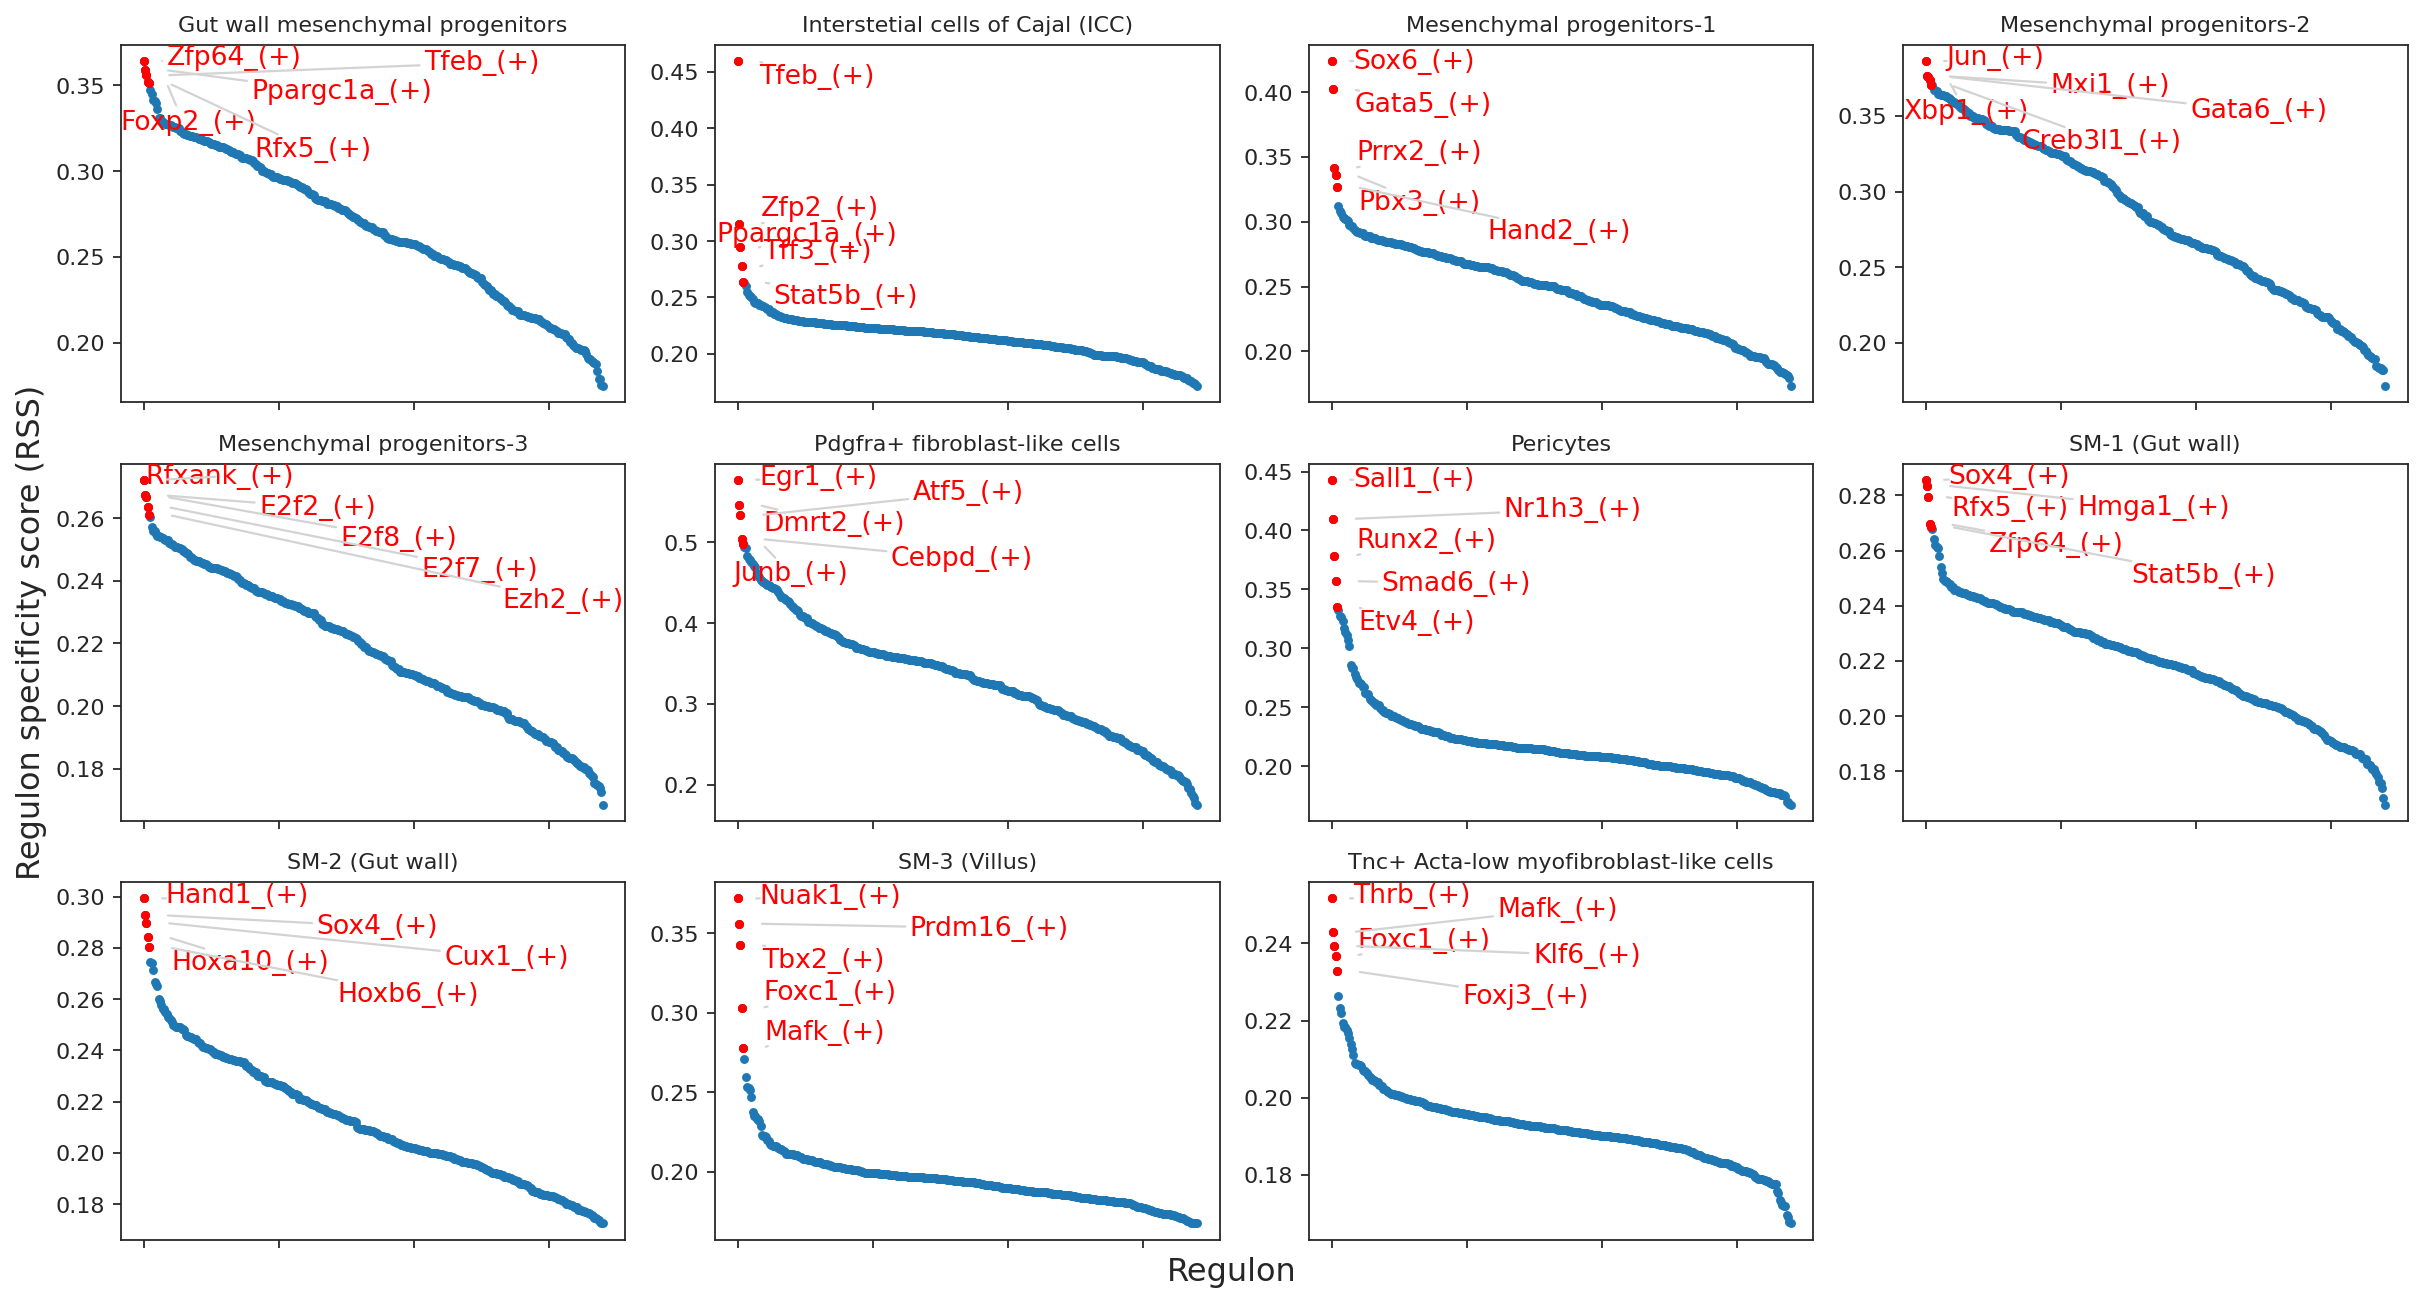

In [74]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=10, frameon=True, figsize=(2, 2), transparent=True, vector_friendly = False, format="pdf")
from adjustText import adjust_text

sns.set_style('ticks')
cats = sorted(list(set(adata.obs['clusters_muscle_leiden_0.7'])))

fig = plt.figure(figsize=(15, 8))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=rss_cellType.T[c]
    ax = fig.add_subplot(3,4,num)
    plot_rss(rss_cellType, c, top_n=5, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(12)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("./figures/small_muscle_cellType-RSS-top5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

In [75]:
topreg = []
for i,c in enumerate(cats):
    topreg.extend(
        list(rss_cellType.T[c].sort_values(ascending=False)[:5].index)
    )
topreg = list(set(topreg))

In [76]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

/tmp/ipykernel_1569391/68287874.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/tmp/ipykernel_1569391/68287874.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/tmp/ipykernel_1569391/68287874.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider join

In [77]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [81]:
colors = sns.color_palette('tab10',n_colors=len(cats) )
colorsd = dict( zip( cats, colors ))
colormap = [ colorsd[x] for x in adata.obs['clusters_muscle_leiden_0.7'] ]

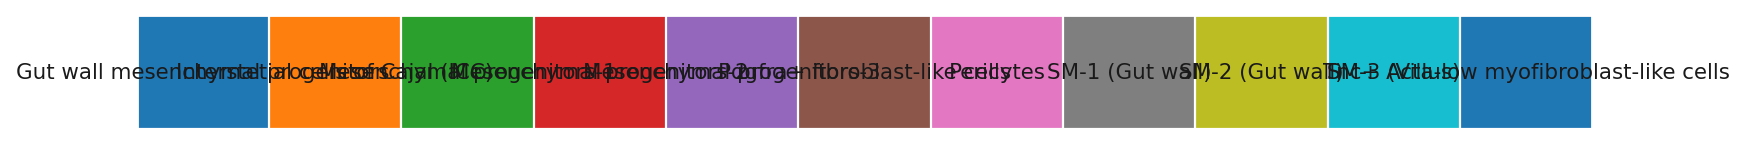

In [84]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( colors, cats, size=1.0)
plt.savefig("figures/small_muscle_cellType-heatmap-legend-top5.pdf", dpi=600, bbox_inches = "tight")

/home/mm2937/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


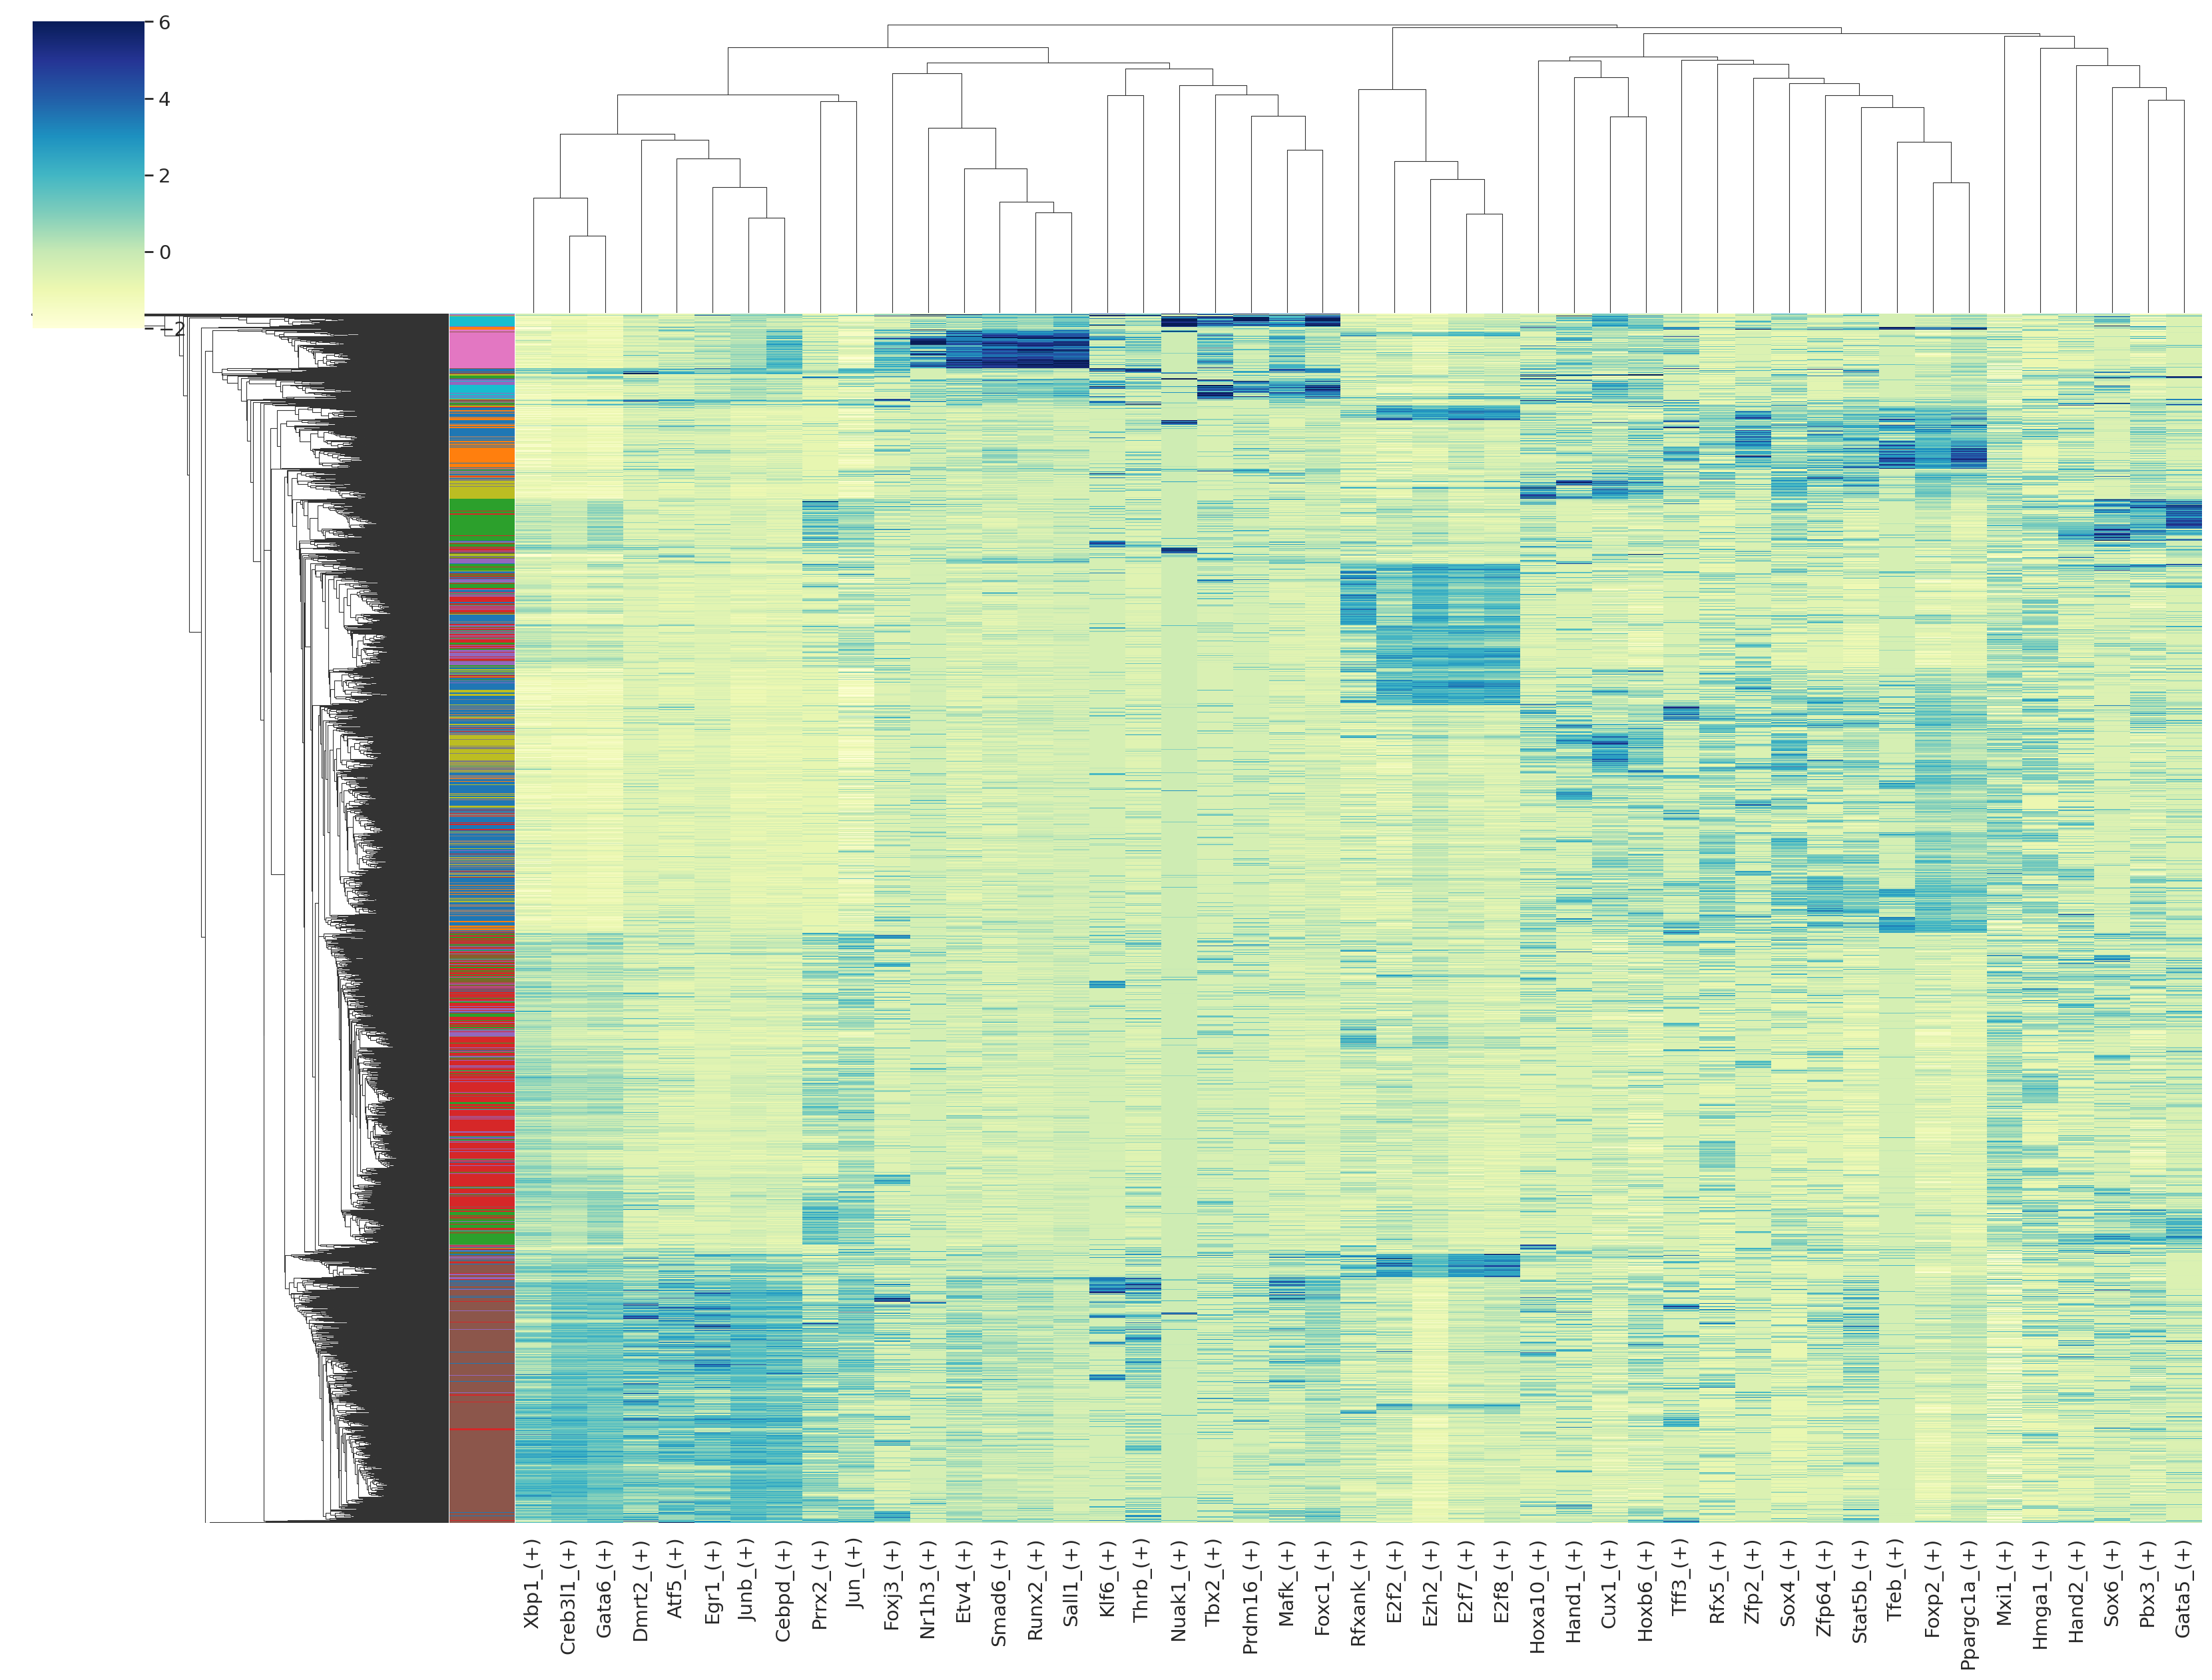

In [83]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(21,16) )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("small_muscle_scenic_cellType-heatmap-top5.pdf", dpi=600, bbox_inches = "tight")